Первые 5 строк набора данных:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Количество пропусков в каждом признаке:
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Размер тренировочного набора: (120, 4)
Размер тестового набора: (30, 4)

Точность модели KNN: 0.9333


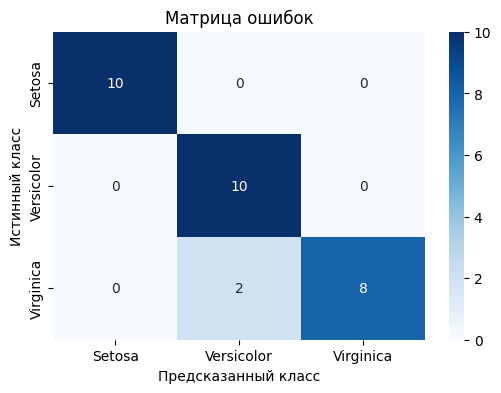

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Этап 0. Предобработка данных

# Шаг 1. Загрузка данных из CSV файла
data = pd.read_csv('iris.csv')
print("Первые 5 строк набора данных:")
print(data.head())

# Шаг 2. Проверка наличия пропусков данных
print("\nКоличество пропусков в каждом признаке:")
print(data.isnull().sum())

# В наборе данных Iris пропусков нет, поэтому пропусков не обрабатываем

# Шаг 3. Разделение данных на тренировочный и тестовый наборы
X = data.drop('variety', axis=1)
y = data['variety']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'\nРазмер тренировочного набора: {X_train.shape}')
print(f'Размер тестового набора: {X_test.shape}')

# Этап 1. Нормализация данных

# Инициализация скалера
scaler = StandardScaler()

# Обучение скалера на тренировочных данных и трансформация
X_train_scaled = scaler.fit_transform(X_train)

# Трансформация тестовых данных
X_test_scaled = scaler.transform(X_test)

# Этап 2. Реализация алгоритма K ближайших соседей

# Выбор значения K
k = 5

# Инициализация модели KNN с выбранным K
knn = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn.fit(X_train_scaled, y_train)

# Предсказание классов для тестового набора
y_pred = knn.predict(X_test_scaled)

# Этап 3. Оценка качества модели

# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)
print(f'\nТочность модели KNN: {accuracy:.4f}')

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()
